C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No handles with labels found to put in legend.



Question 1
	Printing distortion plot for various k


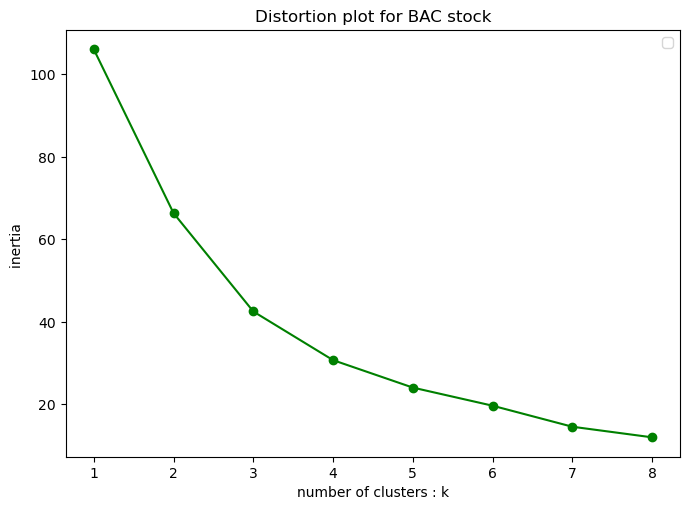


Question 2
	Here are the percentages of red and green labels in each cluster assuming optimal k = 4:
                      label
cluster label_color        
0       green         59.0%
        red           41.0%
1       green         75.0%
        red           25.0%
2       red          100.0%
3       green        100.0%

Question 3
	Based on the above cluster assignments, we can see that there are 2 pure clusters.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn . preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

##set default config
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', 12)
pd.set_option('display.expand_frame_repr', False)
pd.options.display.float_format = '{:,.2f}'.format

##set filenames
input_dir = os.getcwd()
root_dir = os.getcwd()

labels_file ='BAC_weekly_return_volatility_labels'
labels_path_file = os.path.join(input_dir, labels_file+'.csv')


try:
   labels_df = pd.read_csv(labels_path_file)
   #details_df = pd.read_csv(details_path_file)
except Exception as e:
  print(e)
  print('Failed to read input files', labels_file)


## split dataframe into train and test
stock2019_df = labels_df[labels_df['Year'].isin([2019])]
stock2020_df = labels_df[labels_df['Year'].isin([2020])]

# Question 1 - Run kmeans for various k and compute distortion

## ID features and class labels
X = stock2019_df[['mean_return','volatility']]
Y = stock2019_df[['label']]
## Apply scaling to X
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
## Split 2019 into training and test            
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5)

inertia_list = []
for k in range(1,9,1):
    kmeans_classifier=KMeans(n_clusters=k)
    y_kmeans =  kmeans_classifier.fit_predict(X)
    inertia=kmeans_classifier.inertia_
    inertia_list.append(inertia)

print('\nQuestion 1\n\tPrinting distortion plot for various k')    
fig , ax = plt.subplots (1, figsize =(7 ,5))
plt.plot ( range (1, 9,1) , inertia_list , marker ='o',
color ='green')
plt.legend ()
plt.xlabel ('number of clusters : k')
plt.ylabel ('inertia ')
plt.tight_layout ()
plt.title('Distortion plot for BAC stock')
plt.show ()

# Question 2 - calcuate % distribution of labels for optimal k
print('\nQuestion 2')
X1 = stock2020_df[['mean_return','volatility']]
Y1 = stock2020_df[['label']]
scaler = StandardScaler().fit(X1)
X1 = scaler.transform(X1)
optimal_k = 4

        
# Run kmeans on Year 2 data 
kmeans_classifier = KMeans(n_clusters = optimal_k)
y_kmeans = kmeans_classifier.fit_predict (X1)
#centroids = kmeans_classifier.cluster_centers_
#print(f"Centroids for optimal k (5): \n{centroids}")


# Add color to stock_year2
stock2020_df['label_color'] = stock2020_df.apply(lambda row:\
           'green' if row['label'] == '+' else 'red', axis=1)

# Add the clusters 
stock2020_df['cluster'] = y_kmeans

# Compute percentages of green and red labels in each cluster
stock_agg_df = stock2020_df.groupby(['cluster', 'label_color']).agg({'label': 'size'})
# Change: groupby cluster and divide to get cluster distribution
cluster_pcts = stock_agg_df.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).round().astype(str) + '%'
        
print(f"\tHere are the percentages of red and green labels in each cluster assuming optimal k = 4:\n"f"{cluster_pcts}")

# Question 3 - pure clusters
print("\nQuestion 3\n\tBased on the above cluster assignments, we can see that there are 2 pure clusters.")
